In [1]:
import numpy as np
from sklearn.datasets import make_moons, make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
class ANN:
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        
        # Initialize weights and biases
        for i in range(len(layer_sizes)-1):
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.1
            b = np.zeros((1, layer_sizes[i+1]))
            self.weights.append(w)
            self.biases.append(b)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return (x > 0).astype(float)
    
    def forward(self, X):
        activations = [X]
        z_values = []
        
        for i in range(len(self.weights)):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            z_values.append(z)
            
            if i == len(self.weights) - 1:
                # Output layer - sigmoid for binary classification
                activation = self.sigmoid(z)
            else:
                # Hidden layers - ReLU
                activation = self.relu(z)
            
            activations.append(activation)
        
        return activations, z_values
    
    def backward(self, X, y, activations, z_values):
        m = X.shape[0]
        grads_w = []
        grads_b = []
        
        # Output layer error
        error = activations[-1] - y.reshape(-1, 1)
        dZ = error * self.sigmoid_derivative(activations[-1])
        
        # Backpropagate
        for i in reversed(range(len(self.weights))):
            if i == len(self.weights) - 1:
                # Output layer gradient
                grad_w = np.dot(activations[i].T, dZ) / m
                grad_b = np.sum(dZ, axis=0, keepdims=True) / m
            else:
                # Hidden layer gradient
                dA = np.dot(dZ, self.weights[i+1].T)
                dZ = dA * self.relu_derivative(activations[i+1])
                grad_w = np.dot(activations[i].T, dZ) / m
                grad_b = np.sum(dZ, axis=0, keepdims=True) / m
            
            grads_w.insert(0, grad_w)
            grads_b.insert(0, grad_b)
        
        return grads_w, grads_b
    
    def update_params(self, grads_w, grads_b):
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * grads_w[i]
            self.biases[i] -= self.learning_rate * grads_b[i]
    
    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -np.mean(y_true * np.log(y_pred + 1e-8) + 
                       (1 - y_true) * np.log(1 - y_pred + 1e-8))
        return loss
    
    def train(self, X, y, epochs=1000, verbose=True):
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            activations, z_values = self.forward(X)
            y_pred = activations[-1]
            
            # Compute loss
            loss = self.compute_loss(y, y_pred)
            losses.append(loss)
            
            # Backward pass
            grads_w, grads_b = self.backward(X, y, activations, z_values)
            
            # Update parameters
            self.update_params(grads_w, grads_b)
            
            if verbose and epoch % 100 == 0:
                accuracy = self.accuracy(X, y)
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
        
        return losses
    
    def predict(self, X):
        activations, _ = self.forward(X)
        return (activations[-1] > 0.5).astype(int)
    
    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions.flatten() == y)


Epoch 0, Loss: 0.6931, Accuracy: 0.4567
Epoch 100, Loss: 0.6931, Accuracy: 0.6300
Epoch 200, Loss: 0.6931, Accuracy: 0.6533
Epoch 300, Loss: 0.6931, Accuracy: 0.6733
Epoch 400, Loss: 0.6931, Accuracy: 0.7133
Epoch 500, Loss: 0.6931, Accuracy: 0.7500
Epoch 600, Loss: 0.6931, Accuracy: 0.7967
Epoch 700, Loss: 0.6931, Accuracy: 0.8200
Epoch 800, Loss: 0.6931, Accuracy: 0.8333
Epoch 900, Loss: 0.6931, Accuracy: 0.8400


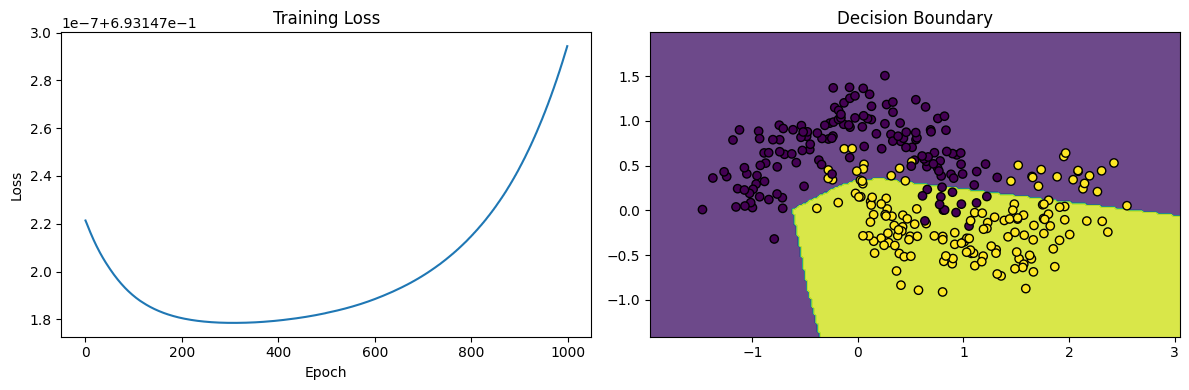

In [21]:
# Create toy dataset
def create_toy_dataset():
    X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
    return X, y

# Example usage
if __name__ == "__main__":
    # Create dataset
    X, y = create_toy_dataset()
    
    # Create and train ANN
    ann = ANN(layer_sizes=[2, 4, 4, 1], learning_rate=0.1)
    losses = ann.train(X, y, epochs=1000, verbose=True)
    
    # Plot results
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    plt.subplot(1, 2, 2)
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = ann.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title('Decision Boundary')
    
    plt.tight_layout()
    plt.savefig('ann_results.png')
    plt.show()